In [52]:
import pandas as pd
from sklearn.pipeline import Pipeline

# Data vis
import seaborn as sns
import matplotlib.pyplot as plt


#NLP
from sklearn.feature_extraction.text import TfidfVectorizer




#ML
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
path_train = '/Users/utkarsh/Desktop/Hateful_memes/data 2/train.jsonl'
path_dev = '/Users/utkarsh/Desktop/Hateful_memes/data 2/dev.jsonl'

In [24]:
train = pd.read_json(path_train,lines= True)
dev = pd.read_json(path_dev, lines = True)

In [25]:
train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [13]:
sum(train['label'])/len(train['label'])

0.3588235294117647

In [28]:
sum(dev['label'])/len(dev['label'])

0.5

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
id       8500 non-null int64
img      8500 non-null object
label    8500 non-null int64
text     8500 non-null object
dtypes: int64(2), object(2)
memory usage: 265.7+ KB


In [30]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
id       500 non-null int64
img      500 non-null object
label    500 non-null int64
text     500 non-null object
dtypes: int64(2), object(2)
memory usage: 15.7+ KB


In [43]:
# creating a basic model to see performance based only on text it-self
pipe = Pipeline([
    ('tvect', TfidfVectorizer()),
    ('pac', PassiveAggressiveClassifier())
])

pipe_params = {'tvect__max_df': [0.6],
               'tvect__min_df': [1],
               'tvect__ngram_range': [(1,3)],
               'pac__max_iter': [50],
               'pac__random_state':[915]
            }


In [44]:
x_train, y_train = train['text'], train['label']
x_dev, y_dev = dev['text'], dev['label']

In [45]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tvect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('pac',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                

In [46]:
y_dev_pred = pipe.predict(x_dev)

In [53]:
# Defining a function to evaluate the predictions
def print_stats(preds, target, labels, sep='-', sep_len=40, fig_size=(5,5)):
    print('Accuracy = %.3f' % metrics.accuracy_score(target, preds))
    print(sep*sep_len)
    print('Classification report:')
    print(metrics.classification_report(target, preds))
    print(sep*sep_len)
    print('Confusion matrix')
    cm=metrics.confusion_matrix(target, preds)
    cm = cm / np.sum(cm, axis=1)[:,None]
    sns.set(rc={'figure.figsize':fig_size})
    sns.heatmap(cm, 
        xticklabels=labels,
        yticklabels=labels,
           annot=True, cmap = 'YlGnBu')
    plt.pause(0.05)

Accuracy = 0.506
----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.77      0.61       250
           1       0.51      0.24      0.33       250

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.47       500
weighted avg       0.51      0.51      0.47       500

----------------------------------------
Confusion matrix


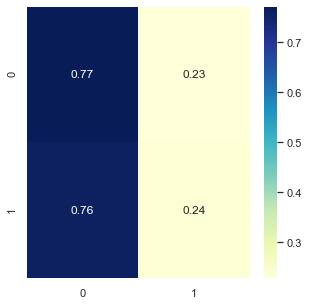

In [54]:
print_stats(y_dev_pred, y_dev, np.unique(y_dev_pred))